Best option 2

In [ ]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload all the files from Q1 Master Thesis fin

Saving [fin]_[size]_[monthly]_[vw].xlsx to [fin]_[size]_[monthly]_[vw].xlsx
Saving [fin]_[value]_[monthly]_[vw].xlsx to [fin]_[value]_[monthly]_[vw].xlsx
Saving File_to_input_ANN_FINLAND.xlsx to File_to_input_ANN_FINLAND.xlsx
Saving FIN_Q1_additional.xlsx to FIN_Q1_additional.xlsx
Saving market_returns.csv to market_returns.csv
Saving monthly_inputs_finland.xlsx to monthly_inputs_finland.xlsx
Saving NOKIA_PX_LAST.xlsx to NOKIA_PX_LAST.xlsx
Saving NORDEA_FINLAND_PX_Last.xlsx to NORDEA_FINLAND_PX_Last.xlsx
Saving Risk Free Finland.xlsx to Risk Free Finland.xlsx
Saving Sampo_PX_Last.xlsx to Sampo_PX_Last.xlsx


In [ ]:
# 2.1 Fama-French Three Factors Model Data

# finmark, SAMPO, returns
SAMPO_monthly = pd.read_excel("Sampo_PX_Last.xlsx") # read data

SAMPO_monthly_array = SAMPO_monthly.to_numpy() # important in order to be able to process data
SAMPO_monthly_returns = SAMPO_monthly_array[:,2] 
SAMPO_returns = SAMPO_monthly_returns[142:369] # start 2/2002, end 2020-12-31

print(SAMPO_monthly[142:369])
SAMPO_returns.shape


         Dates  PX_LAST    Return  Unnamed: 3  SAMPO FH Equity
142 2002-02-28   8.8575 -0.008818         NaN              NaN
143 2002-03-29   9.6556  0.090104         NaN              NaN
144 2002-04-30   8.4339 -0.126528         NaN              NaN
145 2002-05-31   8.3747 -0.007019         NaN              NaN
146 2002-06-28   7.7836 -0.070582         NaN              NaN
..         ...      ...       ...         ...              ...
364 2020-08-31  33.7300  0.099772         NaN              NaN
365 2020-09-30  33.7900  0.001779         NaN              NaN
366 2020-10-30  32.4000 -0.041136         NaN              NaN
367 2020-11-30  36.2300  0.118210         NaN              NaN
368 2020-12-31  34.5700 -0.045818         NaN              NaN

[227 rows x 5 columns]


(227,)

In [ ]:
# 2.2 Fama-French Three Factors Model Data

# finland, Size, SMB
fin_size_monthly_vw = pd.read_excel('[fin]_[size]_[monthly]_[vw].xlsx') # read data
fin_size_monthly_vw_array = fin_size_monthly_vw.to_numpy() # important in order to be able to process data

fin_size_monthly_vw_returns = fin_size_monthly_vw_array[:,6] 
SMB_returns_fin = fin_size_monthly_vw_returns [180:407] # for t-1 start 1/2002, end 2020-11-31

print(fin_size_monthly_vw_array[180:407])
SMB_returns_fin.shape

[['fin' 'size' 'monthly' ... 5.0 Timestamp('2002-01-31 00:00:00')
  0.0822277957264343]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2002-02-28 00:00:00')
  0.065866183008649]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2002-03-31 00:00:00')
  0.0401445925985098]
 ...
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  -0.0339566477808054]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  0.0311482325433216]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  -0.0288760783125516]]


(227,)

In [ ]:
# 2.3 Fama-French Three Factors Model Data

# finland, Value, HML
fin_value_monthly_vw = pd.read_excel('[fin]_[value]_[monthly]_[vw].xlsx') # read data
fin_value_monthly_vw_array = fin_value_monthly_vw.to_numpy() # important in order to be able to process data

fin_value_monthly_vw_returns = fin_value_monthly_vw_array[:,6] 
HML_returns_fin = fin_value_monthly_vw_returns[169:396] # for t-1 start 1/2002, end 2020-11-31

print(fin_value_monthly_vw_array[169:396])
HML_returns_fin.shape

[['fin' 'value' 'monthly' ... 18.0 Timestamp('2002-01-31 00:00:00')
  0.105798889010982]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2002-02-28 00:00:00')
  0.0970888867388465]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2002-03-31 00:00:00')
  0.0262100412287699]
 ...
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  0.0059998029122782]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  0.0102050878813744]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  -0.0079182805118193]]


(227,)

In [ ]:
additional_monthly = pd.read_excel("FIN_Q1_additional.xlsx") # read data

additional_monthly_array = additional_monthly.to_numpy() # important in order to be able to process data
oil_monthly = additional_monthly_array[3:230,2]
eur_usd_monthly = additional_monthly_array[3:230,1]
div_payout_monthly = additional_monthly_array[0:227,3] # t-4 months start Jul 2001
div_payout_monthly.shape

(227,)

In [ ]:
# 2.4 Fama-French Three Factors Model Data

# finland, Historical risk-free rate
risk_free_fin = pd.read_excel('Risk Free Finland.xlsx') # read data
risk_free_fin_array = risk_free_fin.to_numpy() # important in order to be able to process data

#risk_free_fin_returns = risk_free_fin_array[:,6]/100 
#rf_fin = risk_free_fin_returns[3:327]
rf_fin_t1 = risk_free_fin_array[97:324,1]/100 # risk free t-1
rf_fin = risk_free_fin_array[98:325,1]/100

print(risk_free_fin[98:325])
#print(rf_fin)
rf_fin.shape

          Date  Annualized  Rate  \
98  2002-02-01    0.206230  2.25   
99  2002-03-01    0.206230  2.25   
100 2002-04-01    0.206230  2.25   
101 2002-05-01    0.206230  2.25   
102 2002-06-01    0.206230  2.25   
..         ...         ...   ...   
320 2020-08-01   -0.040811 -0.50   
321 2020-09-01   -0.040811 -0.50   
322 2020-10-01   -0.040811 -0.50   
323 2020-11-01   -0.040811 -0.50   
324 2020-12-01   -0.040811 -0.50   

     Data Source in SDW: https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=143.FM.D.U2.EUR.4F.KR.DFR.LEV  
98                                                 NaN                                                    
99                                                 NaN                                                    
100                                                NaN                                                    
101                                                NaN                                                    
102                             

(227,)

In [ ]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [ ]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

### EXCESS RETURNS

In [ ]:
excess_returns_fin = SAMPO_returns - rf_fin
print(excess_returns_fin)

[-0.010880269662000001 0.088042128776 -0.128589913394 -0.009081593688
 -0.072643935264 -0.142575689594 0.052437764776 -0.07329343156399999
 0.034033546106 0.106783539706 -0.052610233181 -0.021547074481
 -0.14231133098100002 -0.035805191771 0.15937535736900002
 0.026369086968999998 -0.0442931319052 0.016348787264799998
 0.0791409529448 -0.0108450402642 0.0408536068548 0.1400194683048
 -0.0081309993812 0.2189299495048 0.0639903251548 0.0511827977848
 -0.15981134819520001 0.0066382953528 -0.0095686395572 -0.0196673717952
 0.0374479169648 0.0938352115848 0.0485790025648 0.0387401918748
 0.0454782611348 0.018121399354799998 0.0424792255748 0.0567412490448
 -0.0356945955452 0.0601879792348 0.1220581341048 -0.0210578476052
 0.0133982910148 0.0303804639248 -0.0311716047952 0.08038284272480001
 0.0627121887448 0.129943095863 0.047530306632999994 0.031368052639
 -0.059476862581 -0.083235336531 -0.008232780783999999
 -0.011624386750999999 0.091621797831 0.016141398381000004 0.030788040456
 0.1210

### MARKET RETURNS

In [ ]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for finfin
# Note: we need to start from 12/1993 for finmark 
mkt_ret_fin = mkt_ret_array[8443:8670] # 227 datapoints for t-1
print(mkt_ret_fin)


[['FIN' '2002-01-31' 137 ... 0.020661976 -0.062121183 0.019271976]
 ['FIN' '2002-02-28' 137 ... 0.0120497619 -0.035709015 0.0107647619]
 ['FIN' '2002-03-31' 136 ... 0.0484063661 0.0196243813 0.0470653661]
 ...
 ['FIN' '2020-09-30' 151 ... -0.008278365 -0.020905457 -0.008354365]
 ['FIN' '2020-10-31' 152 ... -0.008237649 -0.050278555 -0.008310649]
 ['FIN' '2020-11-30' 152 ... 0.1475887608 0.1517259519 0.1475227608]]


In [ ]:
mkt_ret_fin_df = pd.DataFrame(mkt_ret_fin)
#creating the excess market returns
y_fin = mkt_ret_fin[:,7] - rf_fin_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_fin) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_fin = np.asarray(y_fin).astype(np.float32)

print(R_m_fin)
print(len(R_m_fin))

[-0.06279349 -0.03648632  0.01890308 -0.13921855 -0.04384187  0.01049459
 -0.1274554   0.03085225 -0.048148    0.17702192  0.11676241 -0.10778257
 -0.07708856 -0.0356419   0.0263866   0.1778601   0.04985142 -0.04491689
 -0.01739554  0.05806635 -0.01364317  0.09999978  0.05903821 -0.01296576
  0.11046639  0.05482893 -0.02843218 -0.17126544 -0.01167999  0.04518284
 -0.09387457  0.00668898  0.09374376  0.08084435  0.09081902 -0.00057123
 -0.03095703  0.07627653 -0.02505282  0.00752795  0.03069817  0.01817387
  0.01806961  0.01050252  0.0510271  -0.05186009  0.01032892  0.05631825
  0.0645872   0.03363133  0.09894025  0.05336226 -0.05792118 -0.02206378
 -0.00911054  0.03750103 -0.01831308  0.03990898  0.04308216  0.0306725
  0.02954082  0.00834087  0.0579951   0.08193347  0.05574937 -0.00624098
  0.0044959   0.0278243   0.09770828  0.0343878  -0.03383599 -0.03083225
 -0.08753666  0.0375545  -0.03561018 -0.00844368  0.01078917 -0.11175921
 -0.02422935 -0.05788789 -0.22986172 -0.20073625 -0.

### REGRESSION

In [ ]:
# df = pd.DataFrame(market_returns_fin,HML_returns_fin,SMB_returns_fin)
# print(df)
X1 = R_m_fin
X2 = HML_returns_fin
X3 = SMB_returns_fin
X4 = eur_usd_monthly 
X5 = oil_monthly 
X6 = div_payout_monthly

# regressors - that which regresses, or causes regression
X = R_m_fin
X_df = pd.DataFrame(X) # This represents output or column: # R_m_fin
X_df.columns = ['X1 (R_m_fin)']
X_df.insert(1, 'X2 (HML_returns_fin)', HML_returns_fin, True)
X_df.insert(1, 'X3 (SMB_returns_fin)', SMB_returns_fin, True)
X_df.insert(1, 'X4 (eur_usd_monthly)', eur_usd_monthly, True)
X_df.insert(1, 'X5 (oil_monthly)', oil_monthly, True)
X_df.insert(1, 'X6 (div_payout_monthly)', div_payout_monthly, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_fin

     X1 (R_m_fin) X6 (div_payout_monthly) X5 (oil_monthly)  \
0       -0.062793                2.539099            19.42   
1       -0.036486                2.490077            20.28   
2        0.018903                2.000001             23.7   
3       -0.139219                1.114408            25.73   
4       -0.043842                0.361614            25.35   
..            ...                     ...              ...   
222      0.095970                3.827848            43.24   
223      0.080543                2.719588            44.74   
224     -0.020421                0.681856            40.91   
225     -0.049797               -0.243125            40.19   
226      0.152200                -0.10215            42.69   

    X4 (eur_usd_monthly) X3 (SMB_returns_fin) X2 (HML_returns_fin)  
0                 0.8585             0.082228             0.105799  
1                 0.8686             0.065866             0.097089  
2                 0.8718             0.040145   

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(227, 6)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.25,random_state = 0,shuffle=False)

In [ ]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.0238535117758121
Coefficients: [ 0.09851699 -0.00588221 -0.00017904  0.00782857 -0.04060442 -0.09991037]


In [ ]:
# rf_fin
# SAMPO_returns
# HML_returns_fin
# SMB_returns_fin

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

# compute with formulas from the theory
test_prediction_FF3 = mlr.predict(x_test) # yhat
SS_Residual = sum((y_test-test_prediction_FF3)**2)   
SS_Total = sum((y_test)**2)     

# r_squared
r_squared_FF3 = 1 - (float(SS_Residual))/SS_Total
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,test_prediction_FF3)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,test_prediction_FF3)
# Root mean squared error
RMSE = mean_squared_error(y_test,test_prediction_FF3)**0.5

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

R2 = -1.5793911888499048
MSE = 0.010968791158501313
MAE = 0.06360395877621429
Root MSE = 0.10473199682284928


In [ ]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [ ]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [ ]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[0.33978014, 0.25654096, 0.        , 0.        , 0.67581193,
        0.68140763],
       [0.39328315, 0.25147673, 0.00759047, 0.01404924, 0.60883815,
        0.65931946],
       [0.50593302, 0.20084943, 0.03777582, 0.01850049, 0.50355073,
        0.47957396],
       ...,
       [0.4886802 , 0.0651707 , 0.16407767, 0.3164557 , 0.36152787,
        0.40108279],
       [0.39724766, 0.06746991, 0.09955869, 0.31283906, 0.33592029,
        0.38514956],
       [0.3670514 , 0.06924298, 0.11262136, 0.31798581, 0.33132997,
        0.44149141]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [ ]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [ ]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(170, 6)

# OPTION 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='relu'))

#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Adenll as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [ ]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


In [ ]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop]) # 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 0.0109 - val_loss: 0.0466
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0375
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0317
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0284
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0255
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.0230
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0212
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0206
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0205
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0204
Epoch 11/100
9/9 [==========

In [ ]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.010929,0.046589
1,0.008346,0.037519
2,0.007281,0.031707
3,0.006863,0.028360
4,0.006604,0.025494
5,0.006424,0.022971
6,0.006225,0.021199
7,0.006052,0.020600
8,0.005862,0.020487
9,0.005697,0.020380


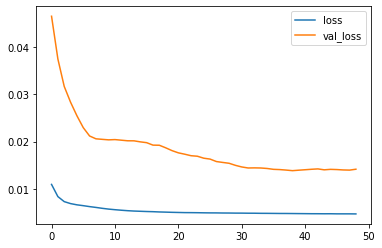

In [ ]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [ ]:
model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN = model.predict(x_test)
test_predictions_ANN = pd.Series(test_predictions_ANN.reshape(57,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

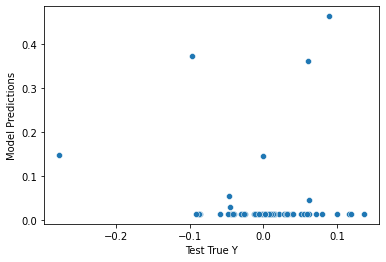

In [ ]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [ ]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.06790162

In [ ]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.0141530875

In [ ]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

0.1189667496053358

In [ ]:
explained_variance_score(y_test, test_predictions_ANN)

-1.9968771934509277

In [ ]:
# Mean squared error
MSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Mean absolute error
MAE_ANN = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Root mean squared error
RMSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

In [ ]:
SS_Residual_ANN = sum((y_test-test_predictions_ANN)**2)   
SS_Total_ANN = sum((y_test)**2)     

# r_squared
r_squared_ANN = 1 - (float(SS_Residual_ANN))/SS_Total_ANN
print(r_squared_ANN)
print(MSE_ANN)
print(MAE_ANN)
print(RMSE_ANN)

-2.328201584008458
0.0141530875
0.06790162
0.1189667496053358


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-1.5793911888499048
0.010968791158501313
0.06360395877621429
0.10473199682284928


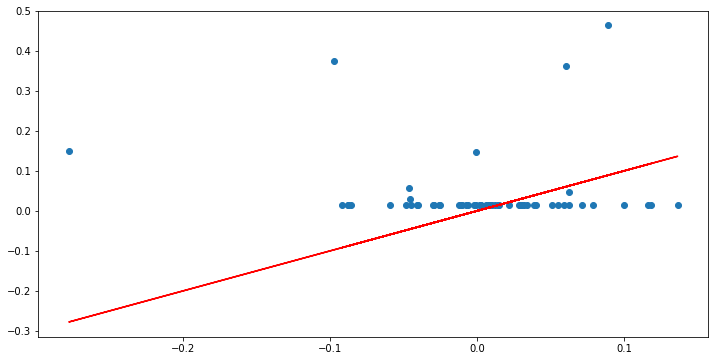

In [ ]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions_ANN)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to andenr, or what problem we are trying to solve.

# Second option: small hidden layer



In [ ]:
model_2 = Sequential()

model_2.add(Dense(6,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [ ]:
model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 11/100
9/9 [==========

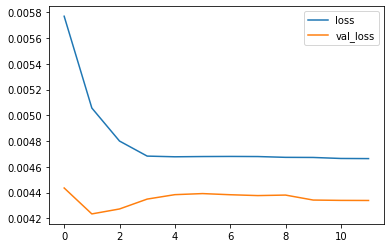

In [ ]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [ ]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN2 = model_2.predict(x_test)
test_predictions_ANN2 = pd.Series(test_predictions_ANN2.reshape(57,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN2],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
SS_Residual_ANN_2 = sum((y_test-test_predictions_ANN2)**2)   
SS_Total_ANN_2 = sum((y_test)**2)     

# r_squared
r_squared_ANN_2 = 1 - (float(SS_Residual_ANN_2))/SS_Total_ANN_2
print(r_squared_ANN_2)

-0.020305599297502308


In [ ]:
MAE_ANN2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.004338822
0.047515053
0.06586973403538941


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-1.5793911888499048
0.010968791158501313
0.06360395877621429
0.10473199682284928


# **Option 3:** **Dropout**

In [ ]:
#@title
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [ ]:
#@title
model_3 = Sequential()

model_3.add(Dense(6,activation='relu')) 
model_3.add(Dropout(0.25)) 

model_3.add(Dense(3,activation='relu')) 

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [ ]:
#@title
model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=100, callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 1s 18ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0066
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0063
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0061
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0058
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0057
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 11/100
9/9 [==========

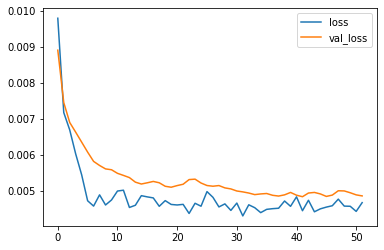

In [ ]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [ ]:
#@title
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions_ANN3 = model_3.predict(x_test)
test_predictions_ANN3 = pd.Series(test_predictions_ANN3.reshape(57,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions_ANN3],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
SS_Residual_ANN_3 = sum((y_test-test_predictions_ANN3)**2)   
SS_Total_ANN_3 = sum((y_test)**2)     

# r_squared
r_squared_ANN_3 = 1 - (float(SS_Residual_ANN_3))/SS_Total_ANN_3
print(r_squared_ANN_3)

-0.14102201593468666


In [ ]:
MAE_ANN3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

print(r_squared_ANN_3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-0.14102201593468666
0.0048521655
0.048326686
0.06965748680534727


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-1.5793911888499048
0.010968791158501313
0.06360395877621429
0.10473199682284928


# Diebold Mariano Function. Reference in the comments

In [ ]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

# Diebold Mariano code and results

In [ ]:
# Replaced with our values
# Comparison between FF3, ANN1
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=-0.6822423692980716, p_value=0.49789807620497584)


In [ ]:
# Replaced with our values
# Comparison between FF3, ANN2
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN2
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=1.4019005258237374, p_value=0.16646366486376504)


In [ ]:
# Replaced with our values
# Comparison between FF3, ANN3
actual_lst = y_test
pred1_lst = test_prediction_FF3
pred2_lst = test_predictions_ANN3
#rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MAD")
#print (rt)
rt = dm_test(actual_lst,pred1_lst,pred2_lst,h = 1, crit="MSE")
print (rt)

dm_return(DM=1.2332381374596308, p_value=0.22263856891363093)


In [ ]:
print(r_squared_ANN)
print(r_squared_ANN_2)
print(r_squared_ANN_3)
print(r_squared_FF3)

-2.328201584008458
-0.020305599297502308
-0.14102201593468666
-1.5793911888499048
